In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation

In [5]:
%matplotlib widget

In [12]:
def fn(x, t):
    return t * 4 * x**2

Adams-Bashforth:

$$ f(t + \Delta t) = f(t) + \Delta t \left( \frac{3}{2}f_t(t) - \frac{1}{2}f_t(t - \Delta t)\right) $$

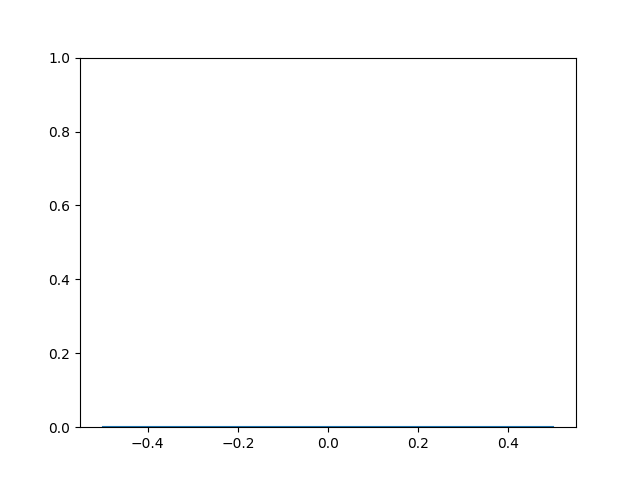

In [ ]:
x = np.linspace(-0.5, 0.5, 100)
y = np.exp(-(x / 0.1)**2)

fig, ax = plt.subplots()

line, = ax.plot(x, y)

ax.set_ylim((0, 1))

def update(frame, line, x):
    y = fn(x, frame)
    line.set_ydata(y)

    return line, x

anim = animation.FuncAnimation(fig, update, frames=np.linspace(0, 1, 100), fargs=(line, x), interval=50)

plt.show()